# EDA based on flowchart requirements

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.random as npr
import statsmodels.api as sm
import scipy.stats as scs
import scipy.optimize as sco
import math

In [6]:
raw = pd.read_csv('/Users/charminagar/Desktop/DSA3101/customer_churn.csv') #varies on path, i renamed the kaggle dataset on my laptop
raw 

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Key features 

In [7]:
# assume the csv has the columns: customer_id, country, gender, age grp, churn_status
# 1:group by attributes average age and churn rate by country n gender
grouped = raw.groupby(['country', 'gender']).agg({'age': np.mean, 'churn': np.mean}).reset_index()

In [ ]:

# 2:sort by age 
sorted_by_age = raw.sort_values(by='age', ascending=True)


In [12]:
sorted_by_age

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
3512,15657779,806,Spain,Male,18,3,0.00,2,1,1,86994.54,0
1678,15569178,570,France,Female,18,4,82767.42,1,1,0,71811.90,0
3517,15757821,771,Spain,Male,18,1,0.00,2,0,0,41542.95,0
9520,15673180,727,Germany,Female,18,2,93816.70,2,1,0,126172.11,0
2021,15795519,716,Germany,Female,18,3,128743.80,1,0,0,197322.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3387,15798024,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3033,15578006,787,France,Female,85,10,0.00,2,1,1,116537.96,0
2458,15813303,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
6759,15660878,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


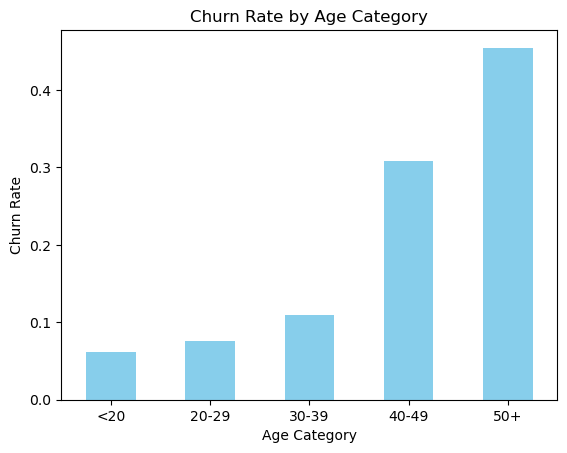

In [15]:
# 3.generatation of plots
#age category vs churn rate
#expected VERY STRONG RELATIONSHIP based on tested data
bins = [0, 20, 30, 40, 50, float('inf')] #age ranges
labels = ['<20', '20-29', '30-39', '40-49', '50+']
raw['age_category'] = pd.cut(raw['age'], bins=bins, labels=labels, right=False)
churn_rates = raw.groupby('age_category')['churn'].mean() #avg it out

churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

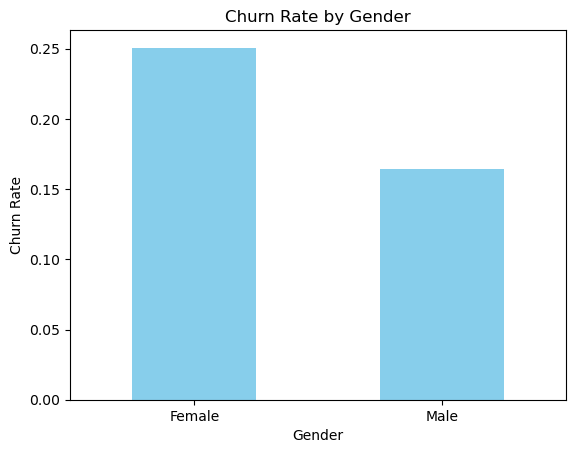

In [16]:
#Strong as well, by gender, female higher churn rate based on previous EDA 
churn_rates = raw.groupby('gender')['churn'].mean() #avg it out
churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

In [20]:
# 4.
#func to retrieve customer data by ID
def retrieve_customer_data(customer_id):
    return raw[raw['customer_id'] == customer_id]
retrieve_customer_data(15798024) #example to show the retrieval

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category
3387,15798024,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0,50+


In [4]:
groups = raw.groupby("churn")

In [22]:
# output the results (for demonstration purposes)
print("Grouped Data by Country and Gender:")
print(grouped)
print("\nData Sorted by Age:")
print(sorted_by_age)

Grouped Data by Country and Gender:
   country  gender        age     churn
0   France  Female  38.773994  0.203450
1   France    Male  38.296404  0.127134
2  Germany  Female  40.154233  0.375524
3  Germany    Male  39.424772  0.278116
4    Spain  Female  39.199265  0.212121
5    Spain    Male  38.649135  0.131124

Data Sorted by Age:
      customer_id  credit_score  country  gender  age  tenure    balance  \
3512     15657779           806    Spain    Male   18       3       0.00   
1678     15569178           570   France  Female   18       4   82767.42   
3517     15757821           771    Spain    Male   18       1       0.00   
9520     15673180           727  Germany  Female   18       2   93816.70   
2021     15795519           716  Germany  Female   18       3  128743.80   
...           ...           ...      ...     ...  ...     ...        ...   
3387     15798024           537  Germany    Male   84       8   92242.34   
3033     15578006           787   France  Female   85  

## Website/Dashboard Tabs

In [26]:
#total num of customers
len(raw)

10000

In [27]:
groups.size() #number of customers who have not left vs left the bank


churn
0    7963
1    2037
dtype: int64

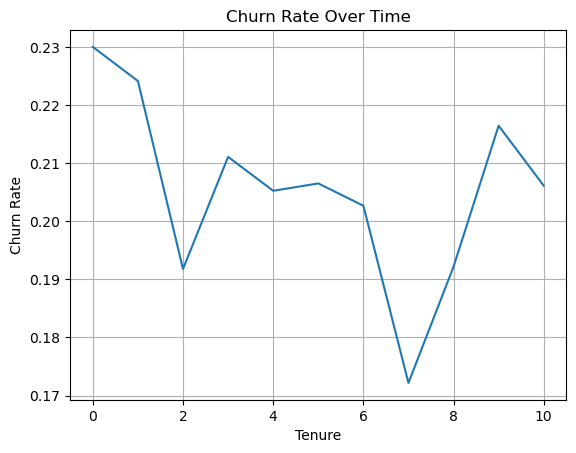

In [29]:
# using tenure
#trend of churn rate based on tenure
churn_rate_over_time = raw.groupby('tenure')['churn'].mean()

plt.plot(churn_rate_over_time.index, churn_rate_over_time.values)
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Over Time')
plt.grid(True)
plt.show()

# previously done EDA

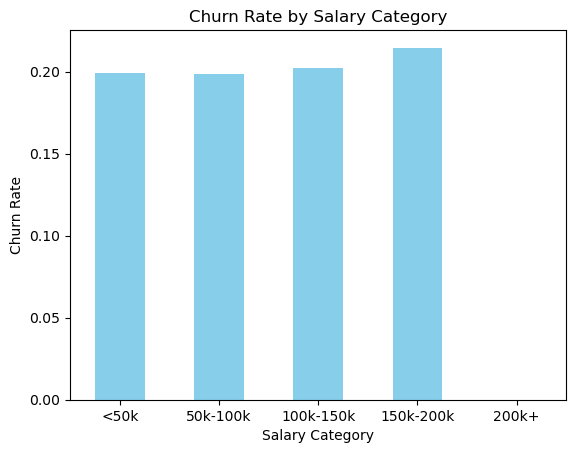

In [104]:
bins = [0, 50000, 100000, 150000, 200000, float('inf')] #salary categories
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
raw['salary_category'] = pd.cut(raw['estimated_salary'], bins=bins, labels=labels, right=False)


churn_rates = raw.groupby('salary_category')['churn'].mean() #avg it out since some salary groups may have more people so count does not work 

churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

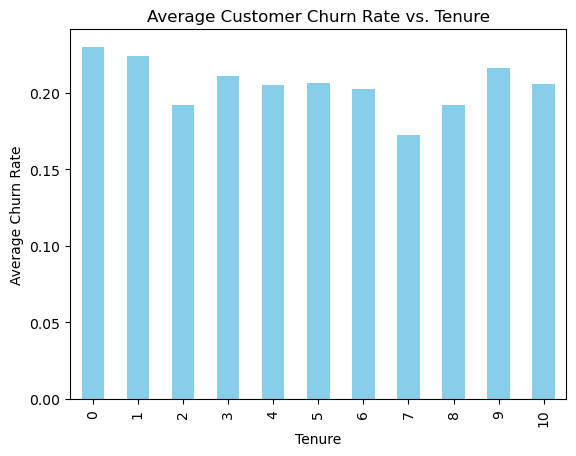

In [61]:
average_churn_vs_tenure = raw.groupby('tenure')['churn'].mean()
average_churn_vs_tenure.plot(kind='bar', color='skyblue')
plt.xlabel('Tenure')
plt.ylabel('Average Churn Rate')
plt.title('Average Customer Churn Rate vs. Tenure')
plt.show()

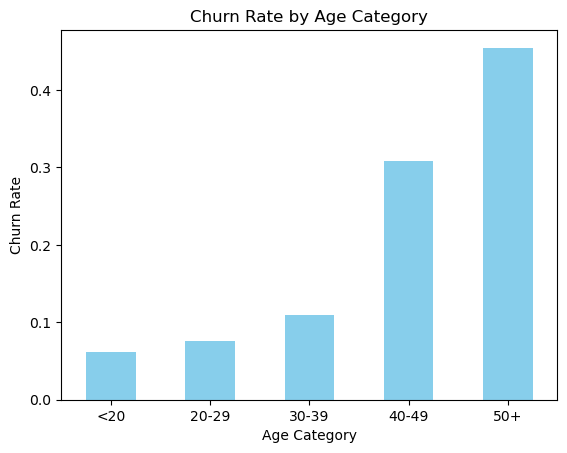

In [66]:
#VERY STRONG RELATIONSHIP
bins = [0, 20, 30, 40, 50, float('inf')] #age ranges
labels = ['<20', '20-29', '30-39', '40-49', '50+']
raw['age_category'] = pd.cut(raw['age'], bins=bins, labels=labels, right=False)


churn_rates = raw.groupby('age_category')['churn'].mean() #avg it out

churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

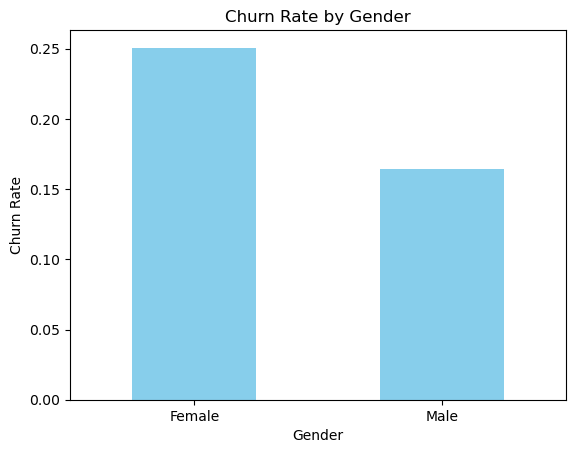

In [79]:
#Strong as well
churn_rates = raw.groupby('gender')['churn'].mean() #avg it out
churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

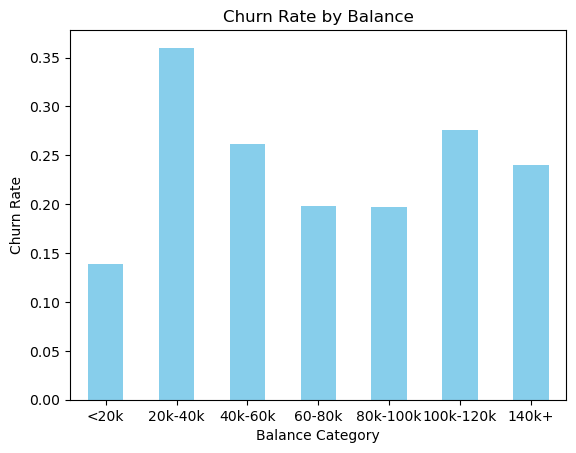

In [82]:
bins = [0, 20000, 40000, 60000, 80000,100000,120000, float('inf')] #age ranges
labels = ['<20k', '20k-40k', '40k-60k', '60-80k', '80k-100k','100k-120k', '140k+']
raw['balance_category'] = pd.cut(raw['balance'], bins=bins, labels=labels, right=False)

churn_rates = raw.groupby('balance_category')['churn'].mean() #avg it out

churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Balance')
plt.xlabel('Balance Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

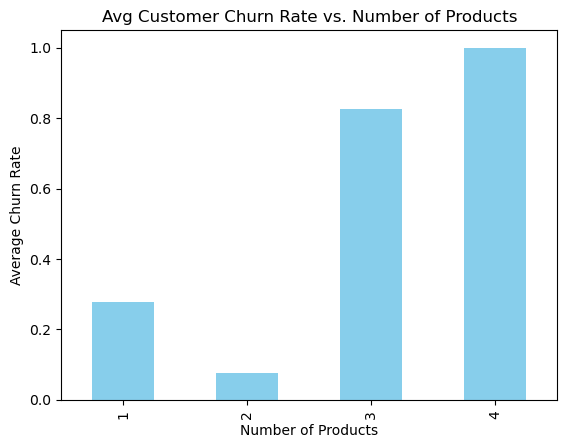

In [85]:
#Big results
average_churn_vs_products = raw.groupby('products_number')['churn'].mean()
average_churn_vs_products.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Products')
plt.ylabel('Average Churn Rate')
plt.title('Avg Customer Churn Rate vs. Number of Products')
plt.show()

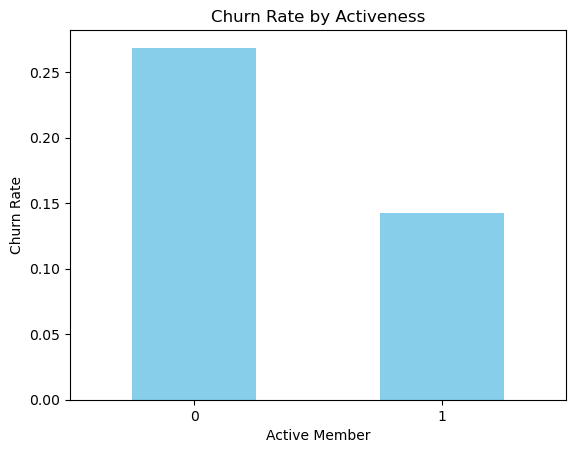

In [88]:
#Strong as well
churn_rates = raw.groupby('active_member')['churn'].mean() #avg it out
churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Activeness')
plt.xlabel('Active Member')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

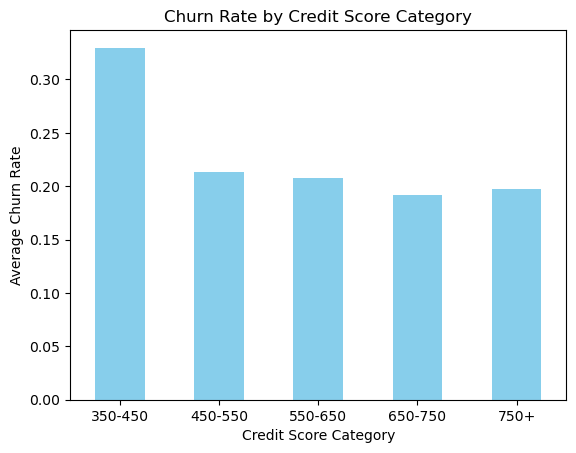

In [100]:
bins = [350, 450, 550, 650, 750, float('inf')]
labels = ['350-450', '450-550', '550-650', '650-750', '750+']

raw['score_category'] = pd.cut(raw['credit_score'], bins=bins, labels=labels, right=False)

churn_rates = raw.groupby('score_category')['churn'].mean()

churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=0)
plt.show()

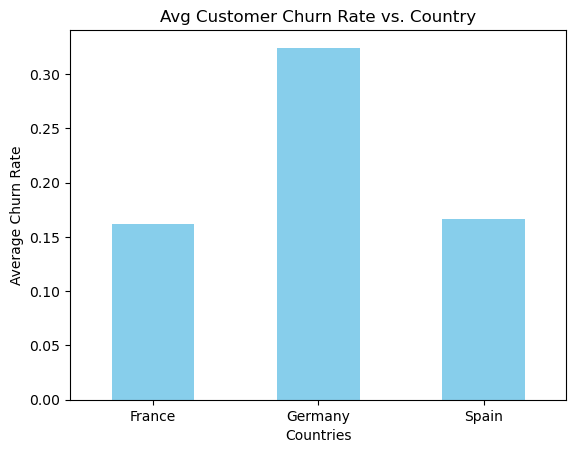

In [103]:
average_churn_vs_products = raw.groupby('country')['churn'].mean()
average_churn_vs_products.plot(kind='bar', color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Average Churn Rate')
plt.title('Avg Customer Churn Rate vs. Country')
plt.xticks(rotation=0)
plt.show()